In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
duplicates = data.duplicated()

# Count total duplicates
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
data = pd.read_csv("q-dataset.csv")
data.head(10)


,ID,Size,Branching Factor,Density,Symmetry,Dead Ends,Solution Path Length,Average Episodes,Success Rate (%)
0,11x11_184,"(11, 11)",1.96,0.60,0.45,5,14,24,100.0
1,11x11_80,"(11, 11)",1.96,0.60,0.45,3,34,88,100.0
2,11x11_94,"(11, 11)",1.96,0.60,0.45,4,26,72,100.0
3,11x13_100,"(13, 11)",1.97,0.59,0.43,4,18,40,100.0
4,11x13_142,"(13, 11)",1.97,0.59,0.43,5,36,104,100.0
5,11x13_23,"(13, 11)",1.97,0.59,0.50,4,32,100,100.0
6,11x13_271,"(13, 11)",1.97,0.59,0.41,6,44,148,100.0
7,11x15_122,"(15, 11)",1.97,0.58,0.44,6,16,28,100.0
8,11x15_17,"(15, 11)",1.97,0.58,0.27,5,32,64,100.0
9,11x19_119,"(19, 11)",1.98,0.57,0.25,5,38,118,100.0


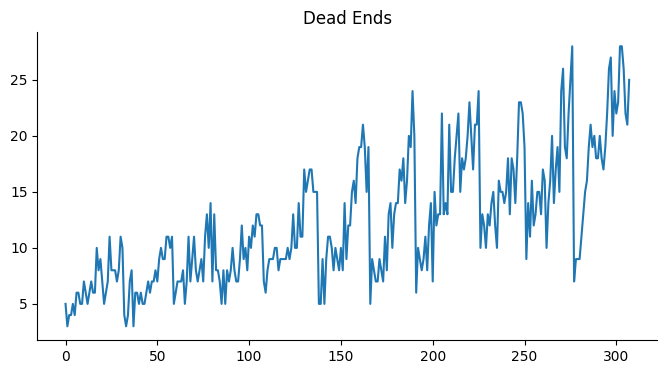

In [ ]:
# @title Dead Ends

from matplotlib import pyplot as plt
data['Dead Ends'].plot(kind='line', figsize=(8, 4), title='Dead Ends')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Check data types and null values
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    308 non-null    object 
 1   Size                  308 non-null    object 
 2   Branching Factor      308 non-null    float64
 3   Density               308 non-null    float64
 4   Symmetry              308 non-null    float64
 5   Dead Ends             308 non-null    int64  
 6   Solution Path Length  308 non-null    int64  
 7   Average Episodes      308 non-null    int64  
 8   Success Rate (%)      308 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 21.8+ KB
None
       Branching Factor     Density    Symmetry   Dead Ends  \
count        308.000000  308.000000  308.000000  308.000000   
mean           1.986753    0.553344    0.189870   12.275974   
std            0.007026    0.014422    0.099742    5.637110   
min            

In [ ]:
# Is size a string or int?
# Extract rows and columns from the "Size" column
data[['Rows', 'Cols']] = data['Size'].str.extract(r'\((\d+),\s*(\d+)\)').astype(int)

# Drop the redundant "Size" column if not needed
data.drop(columns=['Size'], inplace=True)

1. Distributions of numerical columns:

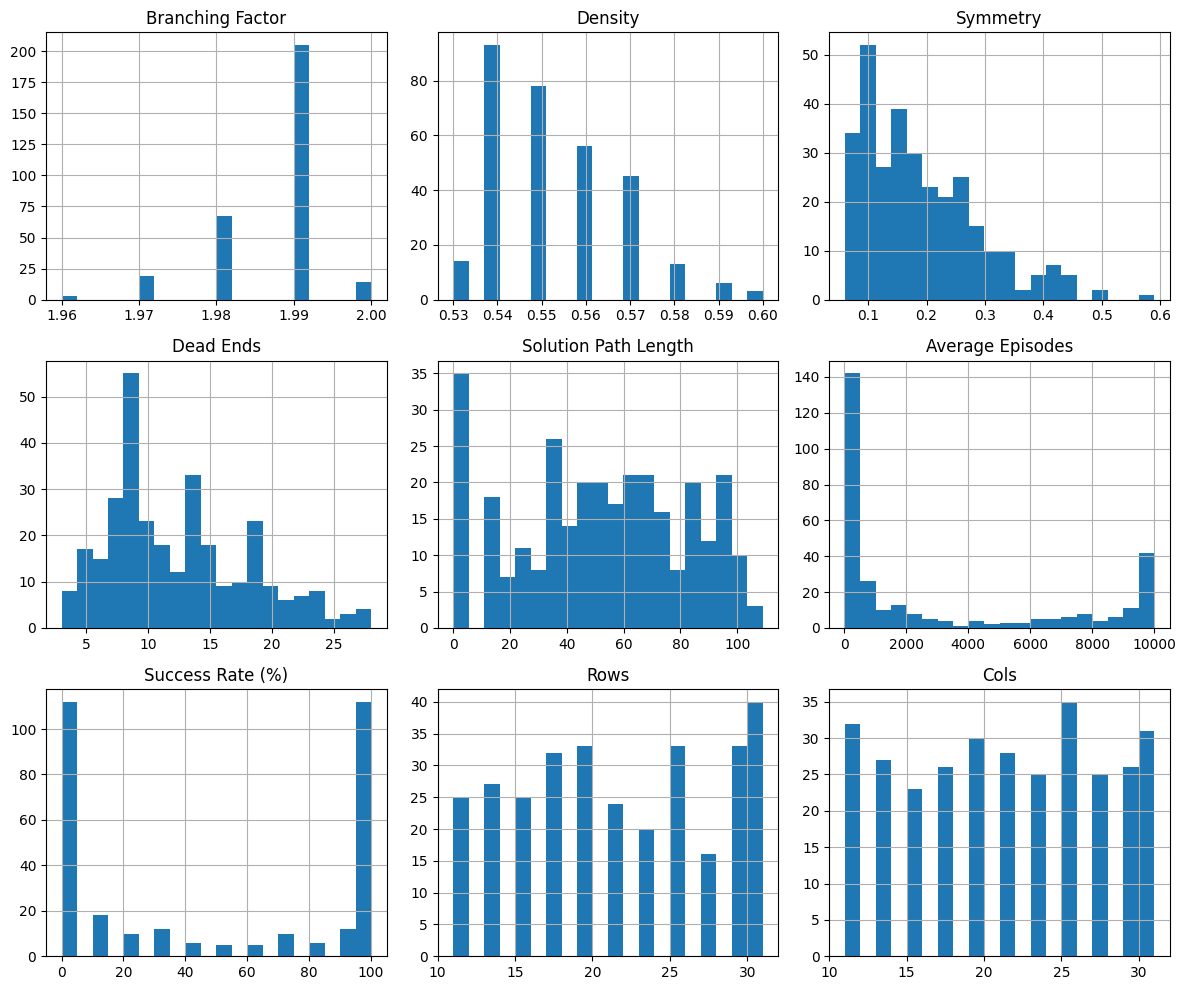

In [ ]:
data.hist(bins=20, figsize=(12, 10), grid=None)
plt.tight_layout()
plt.show()

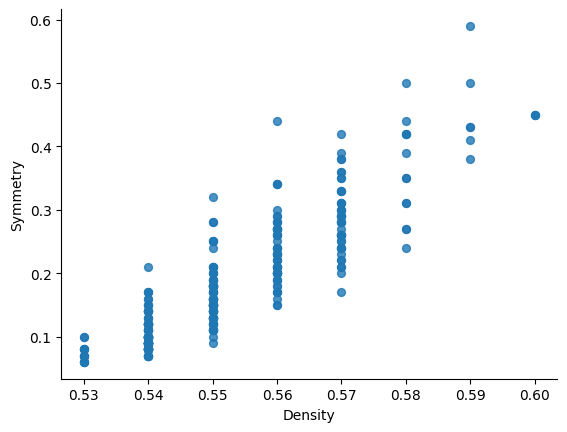

In [ ]:
# @title Density vs Symmetry

data.plot(kind='scatter', x='Density', y='Symmetry', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

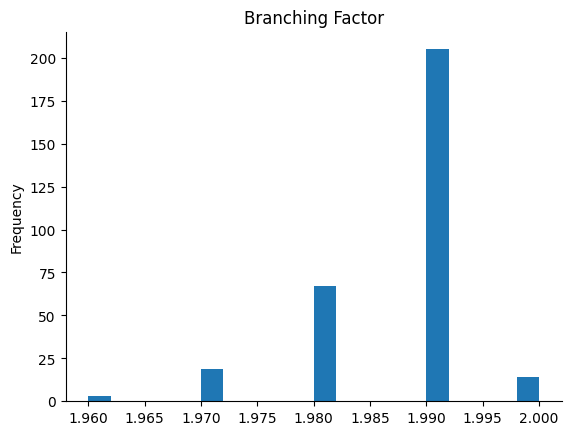

In [ ]:
# @title Branching Factor

data['Branching Factor'].plot(kind='hist', bins=20, title='Branching Factor')
plt.gca().spines[['top', 'right',]].set_visible(False)

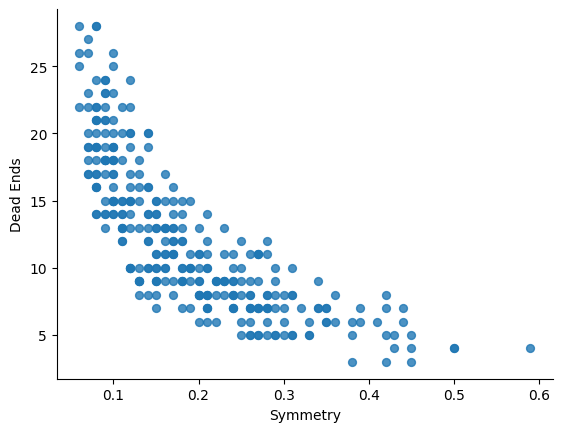

In [ ]:
# @title Symmetry vs Dead Ends

data.plot(kind='scatter', x='Symmetry', y='Dead Ends', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

2. Correlation Heatmap

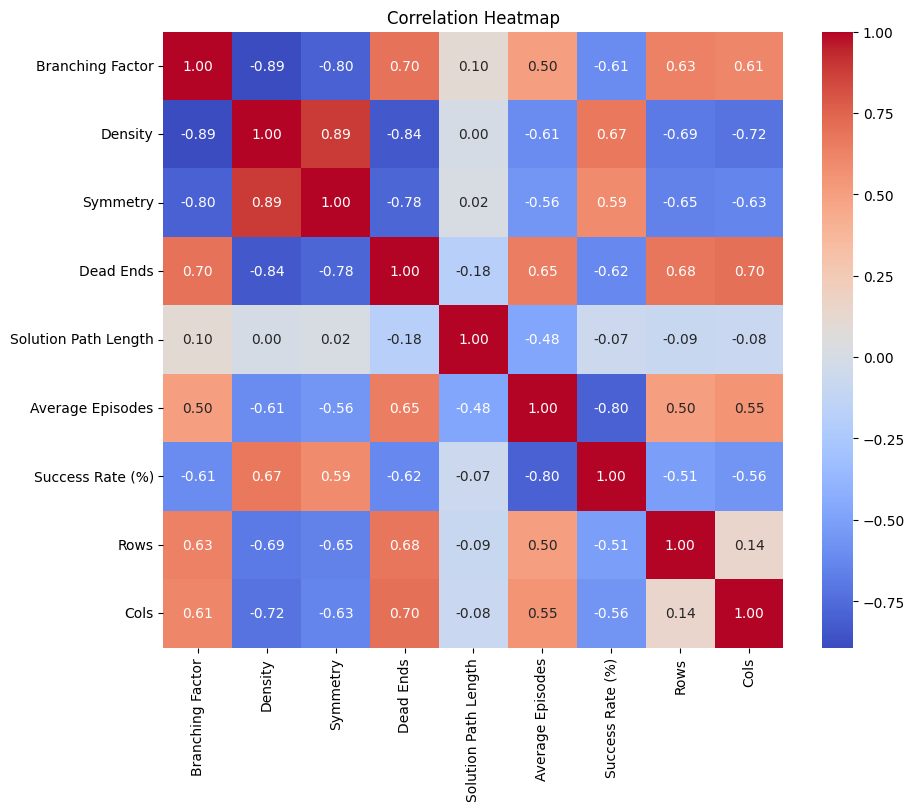

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Observations
- Perfect correlation (1.00) is between values and themselves on the other axis
- High positive values: One tends to have the other increase
- High negatives: one high value tends to have lower values on the other side
- Weak correlations - one does not really influence the other

Check the most important features

In [ ]:
# Drop the 'Size' column
data = data.drop(columns=['ID'])

# Convert columns to numeric, coercing errors
data['Branching Factor'] = pd.to_numeric(data['Branching Factor'], errors='coerce')
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')
data['Symmetry'] = pd.to_numeric(data['Symmetry'], errors='coerce')
data['Success Rate (%)'] = pd.to_numeric(data['Success Rate (%)'], errors='coerce')
# Fill NaN values with the mean (or use other strategies like dropna())
data = data.fillna(data.mean())


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and the target column is 'target'
X = data.drop(columns=['Success Rate (%)'])  # Features
y = data['Success Rate (%)']                 # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                Feature  Importance
5      Average Episodes    0.421729
4  Solution Path Length    0.154022
2              Symmetry    0.095852
3             Dead Ends    0.081643
1               Density    0.077407
7                  Cols    0.066096
6                  Rows    0.054723
0      Branching Factor    0.048527


In [ ]:
from sklearn.inspection import permutation_importance

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df)


                Feature  Importance
5      Average Episodes    0.208065
0      Branching Factor   -0.006452
3             Dead Ends   -0.009677
1               Density   -0.012903
2              Symmetry   -0.012903
6                  Rows   -0.017742
7                  Cols   -0.022581
4  Solution Path Length   -0.059677


In [ ]:
correlation = data.corr()  # For all features
target_corr = correlation['Success Rate (%)'].drop('Success Rate (%)').sort_values(ascending=False)

print("Feature correlation with target:")
print(target_corr)


Feature correlation with target:
Density                 0.674487
Symmetry                0.592879
Solution Path Length   -0.066319
Rows                   -0.514015
Cols                   -0.562032
Branching Factor       -0.606396
Dead Ends              -0.623229
Average Episodes       -0.801772
Name: Success Rate (%), dtype: float64


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Density', 'Symmetry', 'Dead Ends', 'Solution Path Length',
       'Average Episodes'],
      dtype='object')


Selected Features: Index(['Density', 'Symmetry', 'Dead Ends', 'Solution Path Length',
       'Average Episodes'],
      dtype='object')


<ipython-input-33-914e5f70b300>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue=None)


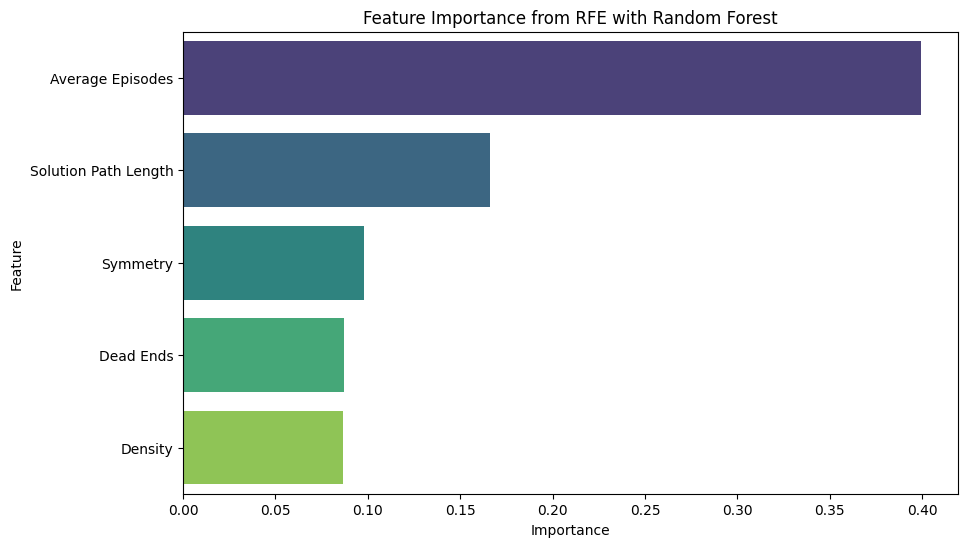

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Get feature importance from the RandomForestClassifier model
model.fit(X, y)
importances = model.feature_importances_

# Filter importances based on the selected features
selected_importances = importances[rfe.support_]

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue=None)
plt.title('Feature Importance from RFE with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NOW, with neural network
- problema: dac q-learning e m rapid si simplu si gaseste in m putine episoade agentul
- q-learning nu se descurca in mazeuri m mari
- neural network nu se descurca in timp, ii treb mult timp de antrenare
- am decis sa lucram cu q-learning, ca sa reusim in timp
- putem folosi q-learning si pe neural network cand nu facem m multe mazeuri


-> putem schimba algoritmul care face mazeuri din dfs in altul
-> concluzie - dac ar fi sa vindem prodsele generate (mazeuri, case smart home adaptate pt roboti), am vinde m scump mazeuri generate cu neural netw, ca ia m mult timp de generat / hardware m puternic